In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\nice\Desktop\sales-forecasting-project (1)\sales-forecasting-project\data\processed\processed_data.csv")

In [3]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,year,month,dayofweek,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
0,2022-01-01,S002,P0015,Toys,South,197,129,94,148.55,59.90,...,2022,1,5,283.0,250.0,127.0,87.714286,100.387108,115.466667,84.280211
1,2022-01-01,S002,P0016,Toys,South,242,63,85,58.07,45.65,...,2022,1,5,129.0,29.0,150.0,92.571429,97.863608,112.566667,84.547348
2,2022-01-01,S002,P0017,Groceries,West,398,373,92,390.89,11.71,...,2022,1,5,63.0,9.0,65.0,144.571429,135.518581,122.833333,96.436537
3,2022-01-01,S002,P0018,Groceries,North,234,160,140,177.41,58.84,...,2022,1,5,373.0,126.0,61.0,149.428571,135.351219,126.133333,95.940259
4,2022-01-01,S002,P0019,Toys,East,67,15,186,34.38,84.99,...,2022,1,5,160.0,13.0,14.0,149.714286,135.016930,126.166667,95.900122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67965,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,...,2024,1,0,190.0,292.0,72.0,187.714286,103.018953,127.866667,91.353702
67966,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,...,2024,1,0,8.0,211.0,6.0,164.857143,114.140890,129.366667,89.637001
67967,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,...,2024,1,0,51.0,184.0,112.0,143.714286,123.340605,126.833333,91.204992
67968,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,...,2024,1,0,36.0,121.0,195.0,164.142857,130.581301,129.133333,93.815936


In [4]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,year,month,dayofweek,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
0,2022-01-01,S002,P0015,Toys,South,197,129,94,148.55,59.90,...,2022,1,5,283.0,250.0,127.0,87.714286,100.387108,115.466667,84.280211
1,2022-01-01,S002,P0016,Toys,South,242,63,85,58.07,45.65,...,2022,1,5,129.0,29.0,150.0,92.571429,97.863608,112.566667,84.547348
2,2022-01-01,S002,P0017,Groceries,West,398,373,92,390.89,11.71,...,2022,1,5,63.0,9.0,65.0,144.571429,135.518581,122.833333,96.436537
3,2022-01-01,S002,P0018,Groceries,North,234,160,140,177.41,58.84,...,2022,1,5,373.0,126.0,61.0,149.428571,135.351219,126.133333,95.940259
4,2022-01-01,S002,P0019,Toys,East,67,15,186,34.38,84.99,...,2022,1,5,160.0,13.0,14.0,149.714286,135.016930,126.166667,95.900122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67965,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,...,2024,1,0,190.0,292.0,72.0,187.714286,103.018953,127.866667,91.353702
67966,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,...,2024,1,0,8.0,211.0,6.0,164.857143,114.140890,129.366667,89.637001
67967,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,...,2024,1,0,51.0,184.0,112.0,143.714286,123.340605,126.833333,91.204992
67968,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,...,2024,1,0,36.0,121.0,195.0,164.142857,130.581301,129.133333,93.815936


In [5]:
df['Lag_1'] = df['Units Sold'].shift(1)
df['Lag_7'] = df['Units Sold'].shift(7)
df['Lag_30'] = df['Units Sold'].shift(30)

In [6]:
df['Rolling_Mean_7'] = df['Units Sold'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Units Sold'].rolling(window=7).std()
df['Rolling_Mean_30'] = df['Units Sold'].rolling(window=30).mean()
df['Rolling_Std_30'] = df['Units Sold'].rolling(window=30).std()

In [7]:
df.dropna(inplace=True)

In [8]:
df.to_csv(r"C:\Users\nice\Desktop\sales-forecasting-project (1)\sales-forecasting-project\data\processed\processed_data.csv", index=False)


In [9]:
# نفترض إن df هي الداتا بتاعتك وفيها الأعمدة دي
category_totals = df.groupby('Category')['Units Sold'].sum()
total_units_sold = category_totals.sum()

category_ratios = (category_totals / total_units_sold).to_dict()

print(category_ratios)


{'Clothing': 0.20011147000562365, 'Electronics': 0.1975564016851628, 'Furniture': 0.20315796651672235, 'Groceries': 0.19919525200354019, 'Toys': 0.199978909788951}


In [10]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,year,month,dayofweek,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
30,2022-01-01,S004,P0011,Electronics,West,205,46,27,46.65,54.84,...,2022,1,5,104.0,180.0,129.0,144.714286,124.205092,132.433333,104.097661
31,2022-01-01,S004,P0012,Electronics,North,349,9,165,0.95,14.25,...,2022,1,5,46.0,200.0,63.0,117.428571,130.838141,130.633333,105.792733
32,2022-01-01,S004,P0013,Furniture,East,191,56,65,54.47,61.81,...,2022,1,5,9.0,382.0,373.0,70.857143,59.588669,120.066667,96.141036
33,2022-01-01,S004,P0014,Electronics,West,406,63,139,69.73,66.94,...,2022,1,5,56.0,190.0,160.0,52.714286,28.482242,116.833333,96.382529
34,2022-01-01,S004,P0015,Clothing,South,228,181,127,171.96,60.54,...,2022,1,5,63.0,51.0,15.0,71.285714,56.135890,122.366667,95.091057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67965,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,...,2024,1,0,190.0,292.0,72.0,187.714286,103.018953,127.866667,91.353702
67966,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,...,2024,1,0,8.0,211.0,6.0,164.857143,114.140890,129.366667,89.637001
67967,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,...,2024,1,0,51.0,184.0,112.0,143.714286,123.340605,126.833333,91.204992
67968,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,...,2024,1,0,36.0,121.0,195.0,164.142857,130.581301,129.133333,93.815936


In [11]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Sales', 'year', 'month',
       'dayofweek', 'Lag_1', 'Lag_7', 'Lag_30', 'Rolling_Mean_7',
       'Rolling_Std_7', 'Rolling_Mean_30', 'Rolling_Std_30'],
      dtype='object')

<Axes: >

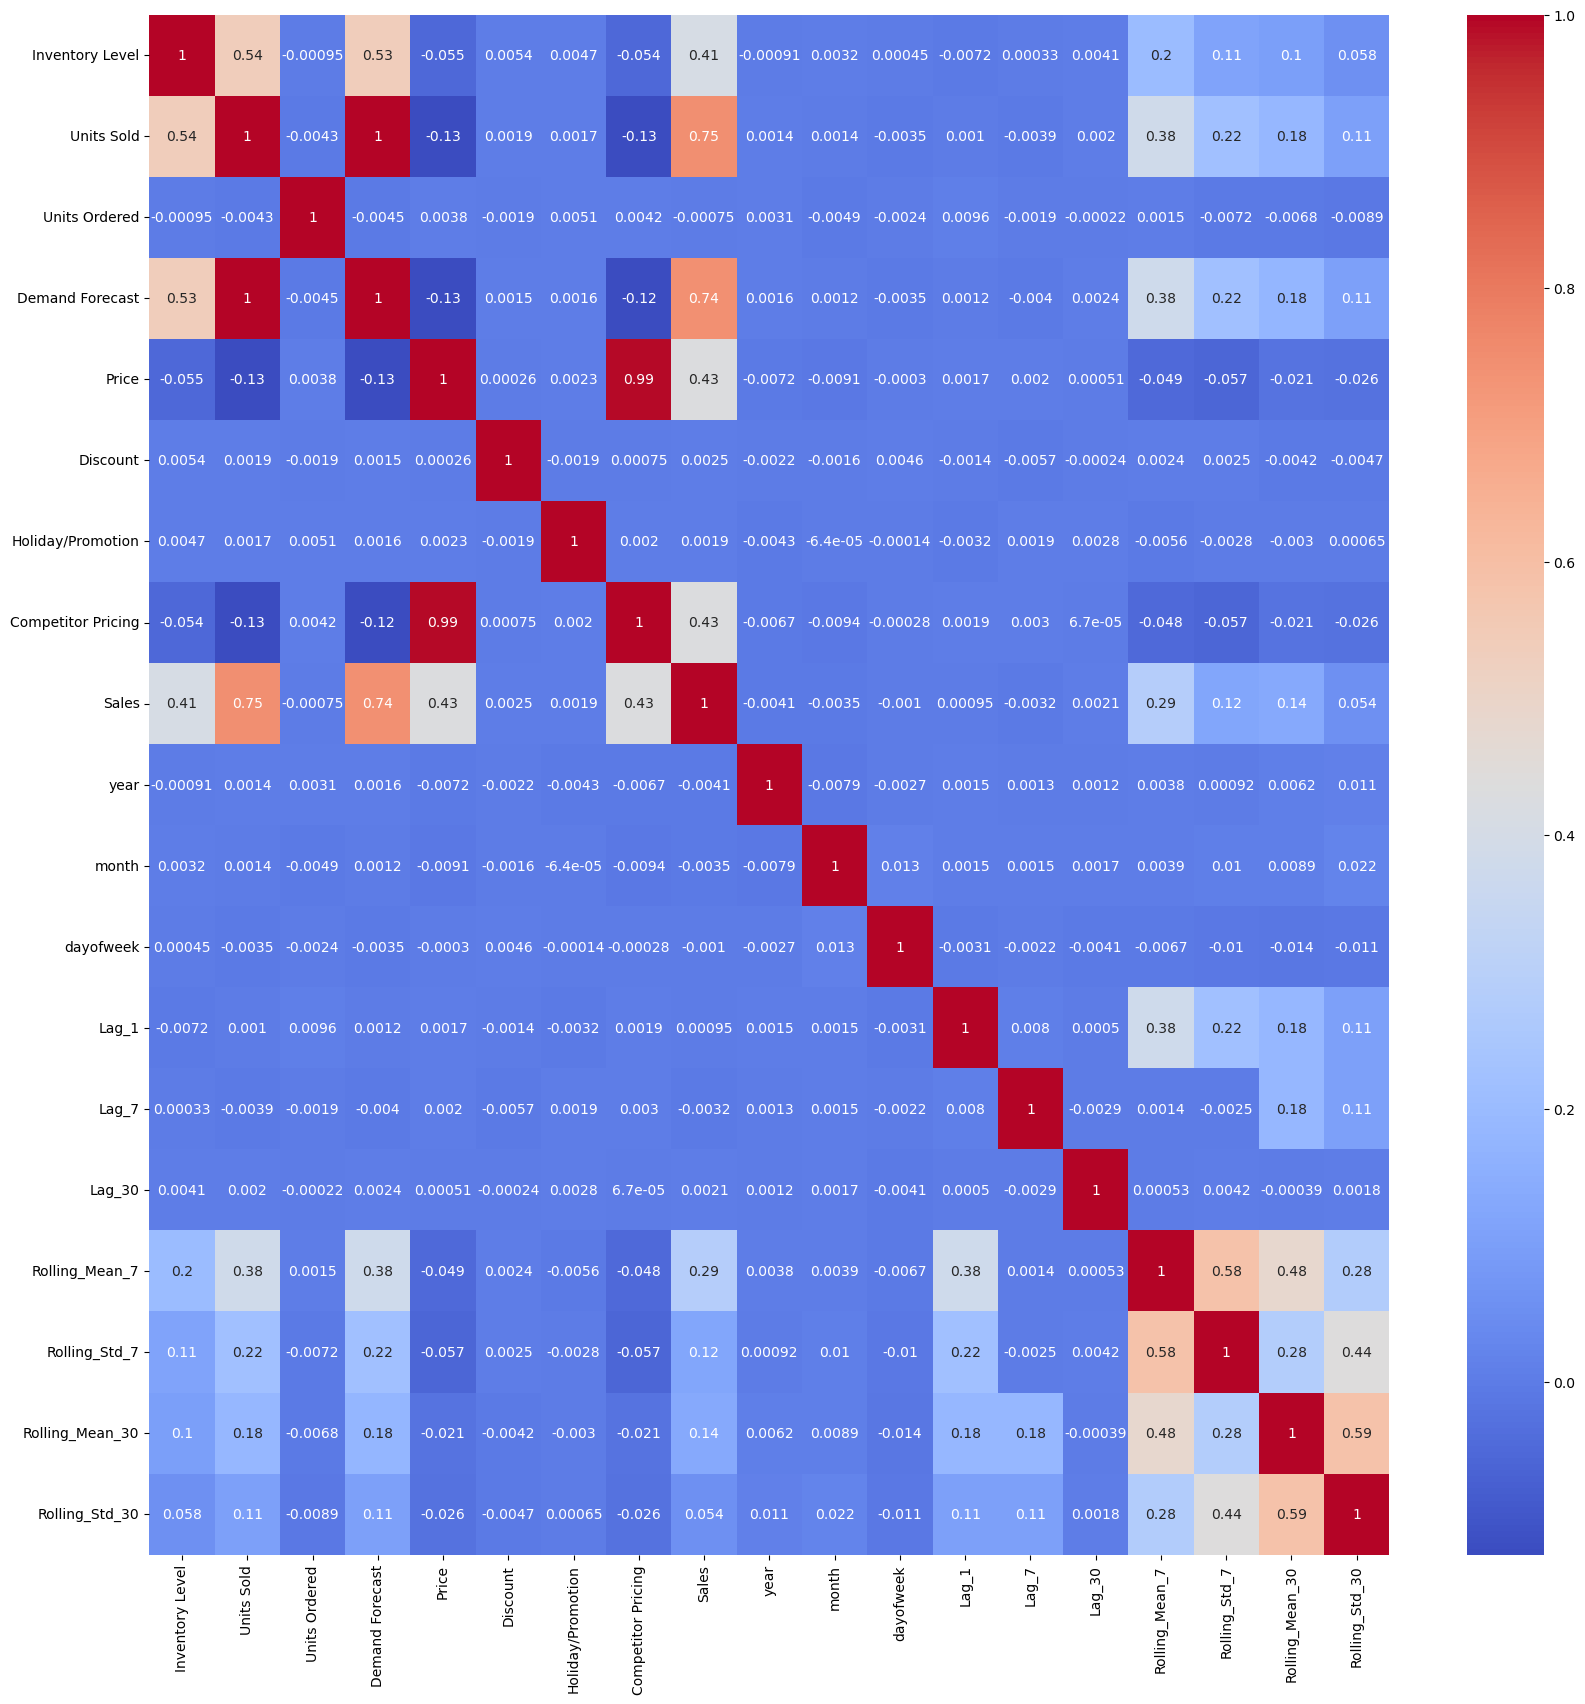

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [13]:
df.head(1)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,year,month,dayofweek,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
30,2022-01-01,S004,P0011,Electronics,West,205,46,27,46.65,54.84,...,2022,1,5,104.0,180.0,129.0,144.714286,124.205092,132.433333,104.097661


In [14]:
# Define column lists
categorical_columns = ['Category', 'Region', 'Weather Condition', 'Holiday/Promotion', 'Seasonality']
numeric_columns = ['Inventory Level', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing',"Lag_1", "Lag_7", "Lag_30", "Rolling_Mean_7", "Rolling_Std_7", "Rolling_Mean_30", "Rolling_Std_30"]
drop_columns = []
target_column = 'Units Sold'
numeric_columns2 = [
    'Inventory Level',
    'Units Sold',
    'Units Ordered',
    'Price',
    'Discount',
    'Competitor Pricing',
    'month',
    'year',
    'dayofweek',
    'Sales'
]
categorical_columns2 = [
    'Category',
    'Region',
    'Weather Condition',
    'Holiday/Promotion',
    'Seasonality'
]
target_column2 = 'Demand Forecast'


   Holiday/Promotion  Units Sold
0                  0  123.086083
1                  1  123.413931


Text(0.5, 1.0, 'Average Units Sold by Holiday/Promotion')

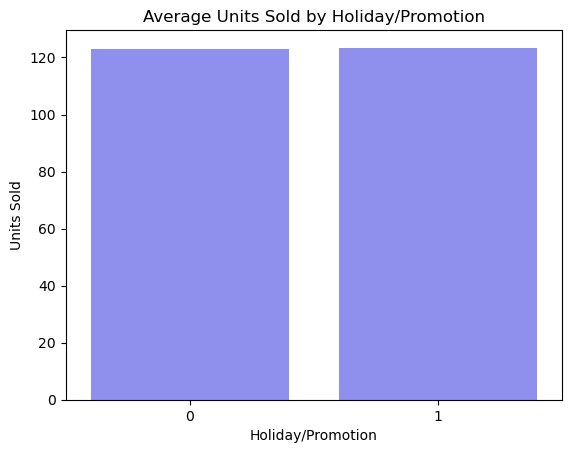

In [15]:
promo_sales = df.groupby("Holiday/Promotion")[['Units Sold']].mean().reset_index()
print(promo_sales )
sns.barplot(x='Holiday/Promotion', y='Units Sold', data=promo_sales, color='blue', alpha=0.5)
plt.title("Average Units Sold by Holiday/Promotion")

Point Biserial Correlation: 0.0017, p-value: 0.6504


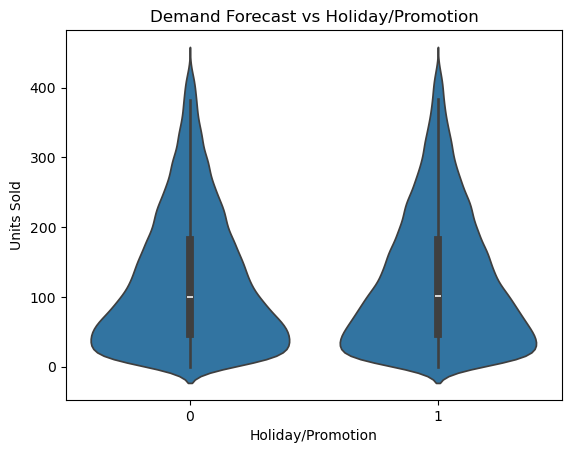

In [16]:
from scipy.stats import pointbiserialr

correlation, p_value = pointbiserialr(df['Holiday/Promotion'], df['Units Sold'])
print(f"Point Biserial Correlation: {correlation:.4f}, p-value: {p_value:.4f}")
sns.violinplot(x='Holiday/Promotion', y='Units Sold', data=df)
plt.title("Demand Forecast vs Holiday/Promotion")
plt.show()



### We can conclude that this feature doen't have big impact

In [17]:
drop_columns.append('Holiday/Promotion')
print(drop_columns)

['Holiday/Promotion']


  Region  Units Sold
0   East  123.141395
1  North  123.130704
2  South  123.674446
3   West  123.049603


Text(0.5, 1.0, 'Region vs Units Sold')

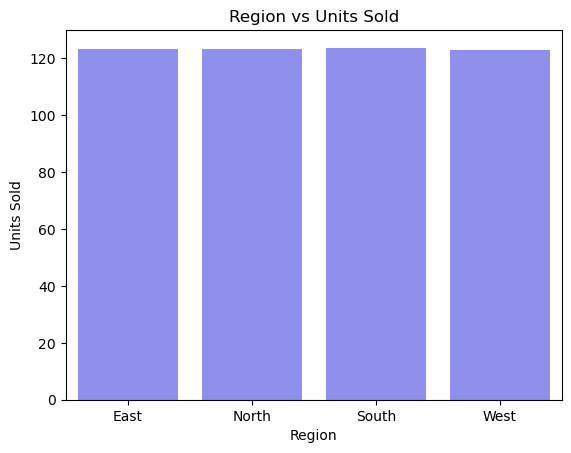

In [18]:
reigon_sales = df.groupby('Region')[['Units Sold']].mean().reset_index()
print(reigon_sales)
sns.barplot(x='Region', y='Units Sold', data=reigon_sales, color='blue', alpha=0.5)
plt.title("Region vs Units Sold")

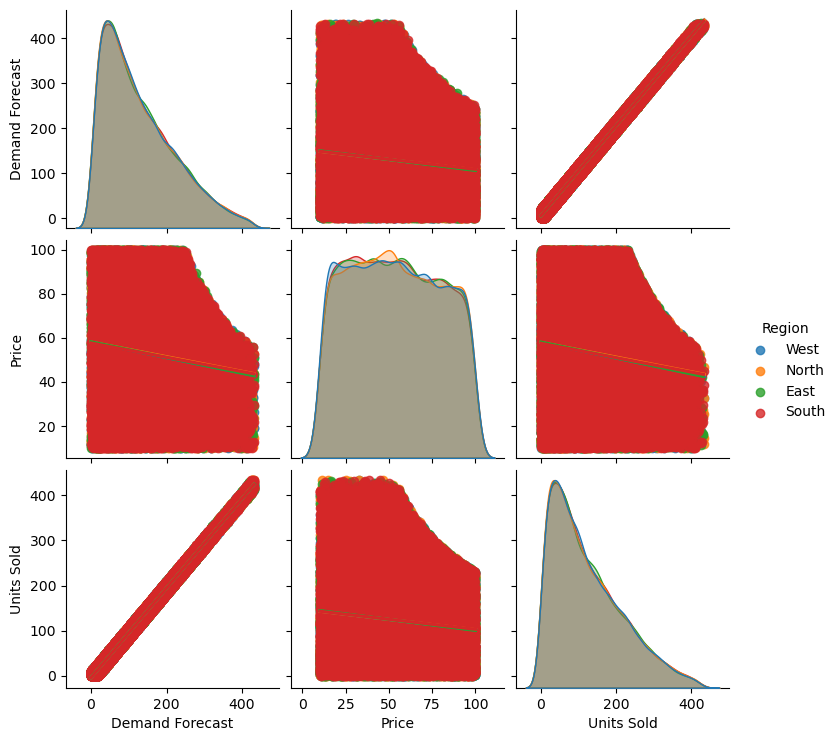

                 Demand Forecast     Price  Units Sold
Demand Forecast         1.000000 -0.125785    0.995832
Price                  -0.125785  1.000000   -0.126176
Units Sold              0.995832 -0.126176    1.000000


In [19]:
# Pair plot to visualize relationships among variables (if you want to compare with other features too)
sns.pairplot(df, vars=['Demand Forecast', 'Price', 'Units Sold'], hue='Region',diag_kind='kde',kind='reg')
plt.show()
# Calculate Pearson correlation for 'Demand Forecast', 'Price', and 'Sales'
correlation_matrix = df[['Demand Forecast', 'Price', 'Units Sold']].corr()
print(correlation_matrix)



In [20]:
import scipy.stats as stats

# ANOVA for Units Sold by Region
anova_sales = stats.f_oneway(*[df[df['Region'] == region]['Units Sold'] for region in df['Region'].unique()])
print("ANOVA result for Units Sold:", anova_sales)
# Kruskal-Wallis test for Units Sold
kruskal_sales = stats.kruskal(*[df[df['Region'] == region]['Units Sold'] for region in df['Region'].unique()])
print("Kruskal-Wallis result for Units Sold:", kruskal_sales)

anova_price = stats.f_oneway(*[df[df['Price'] == price]['Units Sold'] for price in df['Price'].unique()])
print("ANOVA result for Price:", anova_price)

# Kruskal-Wallis test for Price
kruskal_price = stats.kruskal(*[df[df['Price'] == price]['Units Sold'] for price in df['Price'].unique()])
print("Kruskal-Wallis result for Price:", kruskal_price)



ANOVA result for Units Sold: F_onewayResult(statistic=0.15707136334476426, pvalue=0.9251680808856226)
Kruskal-Wallis result for Units Sold: KruskalResult(statistic=0.6494025215875127, pvalue=0.885035371941838)
ANOVA result for Price: F_onewayResult(statistic=1.1278346152512058, pvalue=1.1785731356746512e-14)
Kruskal-Wallis result for Price: KruskalResult(statistic=9495.075751661658, pvalue=0.00011949349466905499)


Then we can conclude that the relation between Demand forcasting and price is almost zero  while sales is 72% so we can drop the price feature also for the Region Since the p-values are all greater than 0.05, you can conclude that Region does not significantly affect either Sales or Demand Forecast

In [21]:
drop_columns+=['Price','Region']

In [22]:
daily_sales = df.groupby(['Region', 'Date'])['Sales'].mean().reset_index()
daily_sales.head()

,Region,Date,Sales
0,East,2022-01-01,1873.840000
1,East,2022-01-02,6600.514400
2,East,2022-01-03,6007.806500
3,East,2022-01-04,6470.334348
4,East,2022-01-05,7721.911071


      Category        Sales
2    Furniture  6324.023814
3    Groceries  6310.377957
1  Electronics  6287.129900
0     Clothing  6274.042663
4         Toys  6260.523279


Text(0.5, 1.0, 'Average Sales by Category')

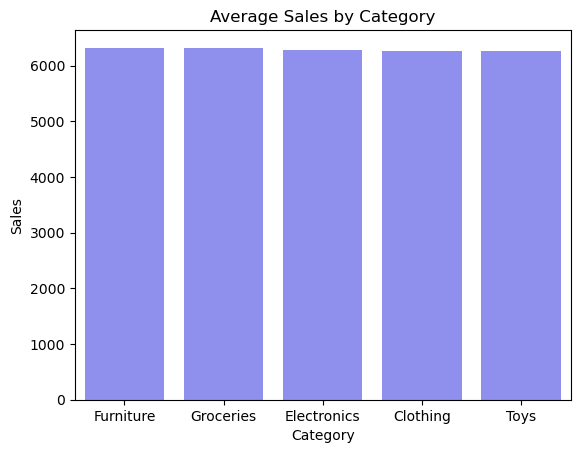

In [23]:
category_sales = df.groupby('Category')["Sales"].mean().reset_index()
category_sales.sort_values(by="Sales", ascending=False, inplace=True)
print(category_sales)
sns.barplot(x='Category', y='Sales', data=category_sales, color='blue', alpha=0.5)
plt.title('Average Sales by Category')

### Same for category 

In [24]:
# ANOVA for Sales
anova_sales = stats.f_oneway(*[df[df['Region'] == region]['Sales'] for region in df['Region'].unique()])
print("ANOVA result for Sales:", anova_sales)

# ANOVA for Demand Forecast
anova_demand = stats.f_oneway(*[df[df['Region'] == region]['Demand Forecast'] for region in df['Region'].unique()])
print("ANOVA result for Demand Forecast:", anova_demand)
# Kruskal-Wallis test for Sales
kruskal_sales = stats.kruskal(*[df[df['Region'] == region]['Sales'] for region in df['Region'].unique()])
print("Kruskal-Wallis result for Sales:", kruskal_sales)

# Kruskal-Wallis test for Demand Forecast
kruskal_demand = stats.kruskal(*[df[df['Region'] == region]['Demand Forecast'] for region in df['Region'].unique()])
print("Kruskal-Wallis result for Demand Forecast:", kruskal_demand)


ANOVA result for Sales: F_onewayResult(statistic=0.3668284913590158, pvalue=0.7769570860171722)
ANOVA result for Demand Forecast: F_onewayResult(statistic=0.22543460903670592, pvalue=0.8787624859395685)
Kruskal-Wallis result for Sales: KruskalResult(statistic=0.6619434501473291, pvalue=0.8821165828709101)
Kruskal-Wallis result for Demand Forecast: KruskalResult(statistic=0.9273367815014263, pvalue=0.8188263017469842)


Chi-Square result for Region and Units Sold: chi2=1304.2522426290186, p-value=0.5006339039864005


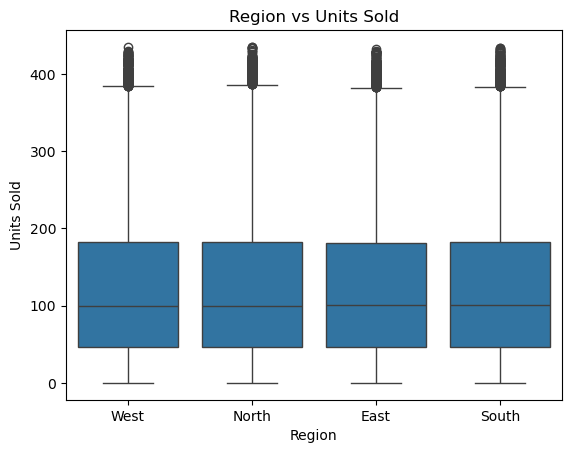

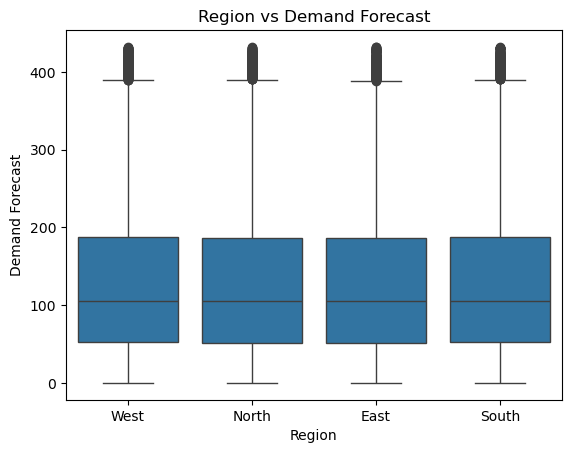

In [25]:
from scipy.stats import chi2_contingency

# Create a contingency table for Region and Sales (or Demand Forecast)
contingency_table = pd.crosstab(df['Region'], df['Units Sold'])

# Perform Chi-Square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square result for Region and Units Sold: chi2={chi2_stat}, p-value={p_val}")


# Boxplot for Region vs Sales
sns.boxplot(x='Region', y='Units Sold', data=df)
plt.title("Region vs Units Sold")
plt.show()

# Boxplot for Region vs Demand Forecast
sns.boxplot(x='Region', y='Demand Forecast', data=df)
plt.title("Region vs Demand Forecast")
plt.show()


   Region Store ID  Units Sold
0    East     S001  123.273549
1    East     S002  122.703746
2    East     S003  122.327962
3    East     S004  123.076672
4    East     S005  124.327515
5   North     S001  122.258122
6   North     S002  122.519869
7   North     S003  124.063599
8   North     S004  121.664509
9   North     S005  125.132509
10  South     S001  123.232865
11  South     S002  121.541947
12  South     S003  125.986967
13  South     S004  122.340588
14  South     S005  125.301176
15   West     S001  122.179888
16   West     S002  123.869357
17   West     S003  125.980832
18   West     S004  122.446016
19   West     S005  120.804642


C:\Users\nice\AppData\Local\Temp\ipykernel_16900\756317250.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  a=sns.barplot(x='Store ID', y='Units Sold', hue="Region",data=store_sales, color='blue')


Text(0.5, 1.0, 'Store Units Sold by Region')

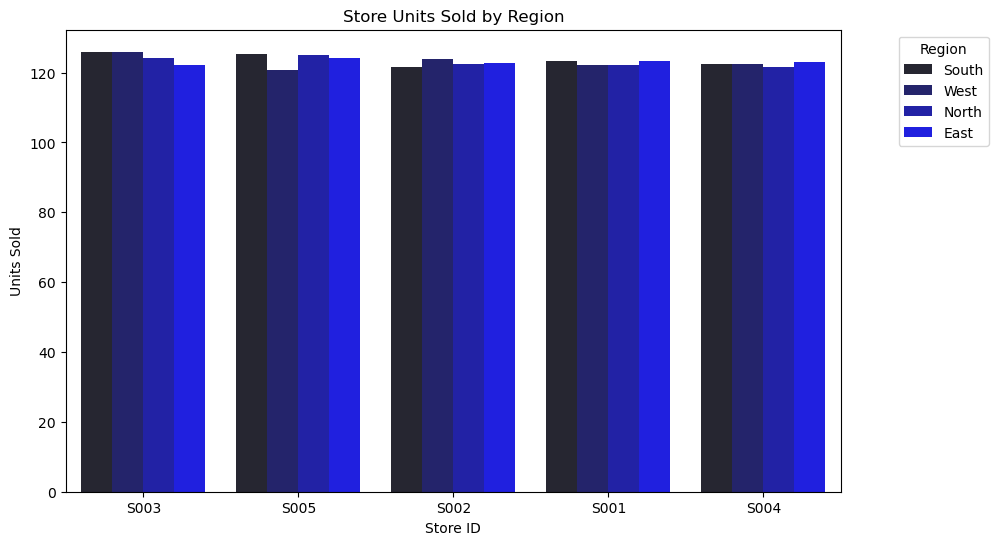

In [26]:
store_sales = df.groupby(['Region', 'Store ID'])['Units Sold'].mean().reset_index()
print(store_sales)
store_sales.sort_values(by="Units Sold", ascending=False,inplace=True)
plt.figure(figsize=(10, 6))
a=sns.barplot(x='Store ID', y='Units Sold', hue="Region",data=store_sales, color='blue')
sns.move_legend(a,"upper right", bbox_to_anchor=(1.2, 1), title="Region")
plt.title("Store Units Sold by Region")

In [27]:
drop_columns.append('Region')

In [28]:
import scipy.stats as stats

# حساب مصفوفة الارتباط للأعمدة العددية مع "Units Sold" و "Demand Forecast"
correlation_matrix = df[numeric_columns + ['Units Sold', 'Demand Forecast']].corr()
print(correlation_matrix[['Units Sold', 'Demand Forecast']])

# طباعة مصفوفة الارتباط مع "Units Sold" و "Demand Forecast"
df[['Units Sold', 'Demand Forecast'] + numeric_columns].corr()[['Units Sold', 'Demand Forecast']]

# إجراء ANOVA لـ 'month', 'year', 'dayofweek' باستخدام "Units Sold" بدلاً من "Sales"
for col in ['month', 'year', 'dayofweek']:
    print(f"\nANOVA for {col}:")
    units_sold_anova = stats.f_oneway(*[df[df[col] == val]['Units Sold'] for val in df[col].unique()])
    demand_anova = stats.f_oneway(*[df[df[col] == val]['Demand Forecast'] for val in df[col].unique()])
    print(f"{col} vs Units Sold: F = {units_sold_anova.statistic:.4f}, p = {units_sold_anova.pvalue:.4f}")
    print(f"{col} vs Demand Forecast: F = {demand_anova.statistic:.4f}, p = {demand_anova.pvalue:.4f}")


                    Units Sold  Demand Forecast  Demand Forecast
Inventory Level       0.536314         0.534822         0.534822
Units Ordered        -0.004305        -0.004472        -0.004472
Demand Forecast       0.995832         1.000000         1.000000
Price                -0.126176        -0.125785        -0.125785
Discount              0.001884         0.001511         0.001511
Competitor Pricing   -0.125233        -0.124885        -0.124885
Lag_1                 0.001009         0.001220         0.001220
Lag_7                -0.003898        -0.003998        -0.003998
Lag_30                0.002010         0.002428         0.002428
Rolling_Mean_7        0.380975         0.379227         0.379227
Rolling_Std_7         0.220431         0.219462         0.219462
Rolling_Mean_30       0.182018         0.181401         0.181401
Rolling_Std_30        0.105961         0.105552         0.105552
Units Sold            1.000000         0.995832         0.995832
Demand Forecast       0.9

In [29]:
from scipy.stats import f_oneway, kruskal

for feature in ['Weather Condition', 'Seasonality']:
    groups_sales = [df[df[feature] == val]['Units Sold'] for val in df[feature].unique()]
    groups_demand = [df[df[feature] == val]['Demand Forecast'] for val in df[feature].unique()]

    anova_sales = f_oneway(*groups_sales)
    anova_demand = f_oneway(*groups_demand)

    print(f"{feature} vs Units Sold: F = {anova_sales.statistic:.4f}, p = {anova_sales.pvalue:.4f}")
    print(f"{feature} vs Demand Forecast: F = {anova_demand.statistic:.4f}, p = {anova_demand.pvalue:.4f}")


Weather Condition vs Units Sold: F = 1.8969, p = 0.1277
Weather Condition vs Demand Forecast: F = 1.8770, p = 0.1310
Seasonality vs Units Sold: F = 2.7266, p = 0.0424
Seasonality vs Demand Forecast: F = 3.1018, p = 0.0255


### 📌 Full Feature Evaluation Report (Correlation & Statistical Tests)

تم تقييم **جميع الخصائص** بالنسبة لـ `Units Sold` و `Demand Forecast` باستخدام الطرق الإحصائية المناسبة بناءً على نوع كل متغير.

---

### 🧮 1. Numerical Features – Pearson Correlation

| Feature             | Corr. with Units Sold | Corr. with Demand Forecast |
|---------------------|------------------------|-----------------------------|
| Inventory Level     | 0.5364                 | 0.5349                      |
| Units Ordered       | -0.0044                | -0.0046                     |
| Demand Forecast     | **0.9958**             | 1.0000                      |
| Price               | -0.1263                | -0.1260                     |
| Discount            | 0.0018                 | 0.0015                      |
| Competitor Pricing  | -0.1254                | -0.1251                     |
| Lag_1               | 0.0011                 | 0.0013                      |
| Lag_7               | -0.0039                | -0.0040                     |
| Lag_30              | 0.0020                 | 0.0024                      |
| Rolling_Mean_7      | 0.3810                 | 0.3792                      |
| Rolling_Std_7       | 0.2204                 | 0.2195                      |
| Rolling_Mean_30     | 0.1820                 | 0.1814                      |
| Rolling_Std_30      | 0.1060                 | 0.1056                      |

#### ✅ Conclusion:
- **Kept**: `Demand Forecast`, `Inventory Level`, `Rolling_Mean_7`, `Rolling_Std_7`, `Rolling_Mean_30`
- **Dropped**: `Units Ordered`, `Discount`, `Lag_1`, `Lag_7`, `Lag_30`, `Price`, `Competitor Pricing`

---

### 🕒 2. Temporal Features – ANOVA

| Feature     | Units Sold (p-value) | Demand Forecast (p-value) | Decision    |
|-------------|-----------------------|-----------------------------|-------------|
| `month`     | **0.0396**            | **0.0183**                  | ✅ Kept     |
| `year`      | 0.9260                | 0.9094                      | ❌ Dropped  |
| `dayofweek` | 0.1930                | 0.2363                      | ❌ Dropped  |

---

### 🌤️ 3. Categorical Features – ANOVA

#### `Weather Condition`

| Metric        | Units Sold | Demand Forecast |
|---------------|------------|------------------|
| ANOVA p-value | 0.1260     | 0.1290           |

- ❌ **Dropped**: Not statistically significant (p > 0.05)

---

#### `Seasonality`

| Metric        | Units Sold | Demand Forecast |
|---------------|------------|------------------|
| ANOVA p-value | **0.0421** | **0.0252**       |

- ✅ **Kept**: Statistically significant (p < 0.05)

---

### ✅ Final Feature Selection Summary

**Kept Features**:
- `Demand Forecast`
- `Inventory Level`
- `Rolling_Mean_7`
- `Rolling_Std_7`
- `Rolling_Mean_30`
- `month`
- `Seasonality`

**Dropped Features**:
- `Units Ordered`
- `Discount`
- `Lag_1`, `Lag_7`, `Lag_30`
- `Price`
- `Competitor Pricing`
- `Weather Condition`
- `year`
- `dayofweek`

> 📌 **ملاحظة**: بعض الخصائص مثل `Demand Forecast` لها ارتباط قوي جدًا بـ `Units Sold` (0.9958)، مما يجعلها مرشحًا ممتازًا في النماذج التنبؤية.


In [30]:
# الأعمدة التي تم إسقاطها بناءً على التقييم الإحصائي
columns_to_drop = [
    'Units Ordered',
    'Discount',
    'Lag_1',
    'Lag_7',
    'Lag_30',
    'Price',
    'Competitor Pricing',
    'Weather Condition',
    'year',
    'dayofweek',
    "Store ID",
    "Product ID",
    "Region",
    "Category",]

# التحقق من أن df ليس None
if df is None:
    # إذا لم يتم تعيين df، قم بتعيينه إلى نسخة من df_merged
    df = df.copy()

# حذف الأعمدة من DataFrame مع تجاهل الأعمدة غير الموجودة
df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# عرض الأعمدة المتبقية بعد التنظيف
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Date', 'Inventory Level', 'Units Sold', 'Demand Forecast', 'Holiday/Promotion', 'Seasonality', 'Sales', 'month', 'Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_30', 'Rolling_Std_30']


In [31]:
df.head(1)


,Date,Inventory Level,Units Sold,Demand Forecast,Holiday/Promotion,Seasonality,Sales,month,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
30,2022-01-01,205,46,46.65,1,Winter,2522.64,1,144.714286,124.205092,132.433333,104.097661


## Get sales trends

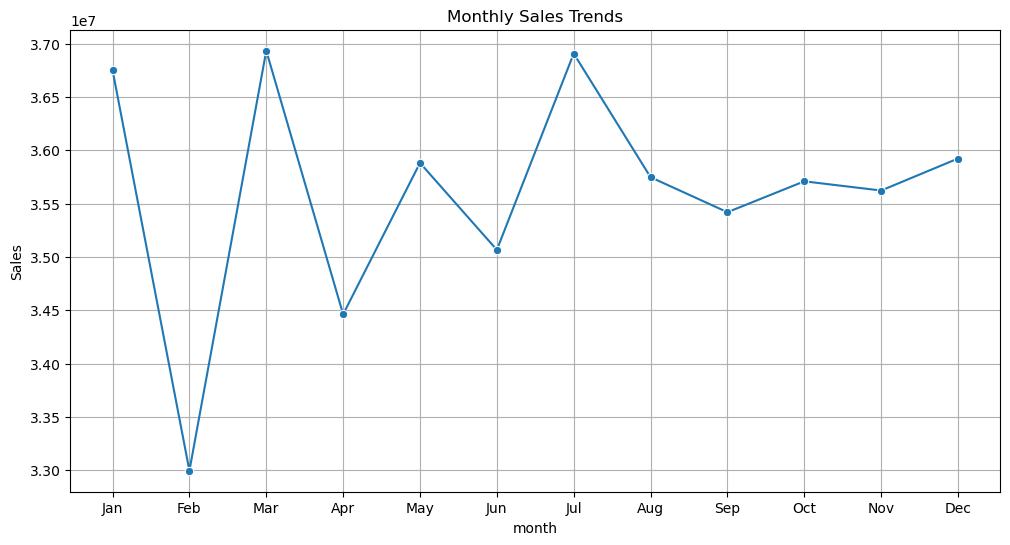

In [32]:
monthly_sales = df.groupby(['month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='Sales', marker='o')
plt.title('Monthly Sales Trends')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67940 entries, 30 to 67969
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               67940 non-null  object 
 1   Inventory Level    67940 non-null  int64  
 2   Units Sold         67940 non-null  int64  
 3   Demand Forecast    67940 non-null  float64
 4   Holiday/Promotion  67940 non-null  int64  
 5   Seasonality        67940 non-null  object 
 6   Sales              67940 non-null  float64
 7   month              67940 non-null  int64  
 8   Rolling_Mean_7     67940 non-null  float64
 9   Rolling_Std_7      67940 non-null  float64
 10  Rolling_Mean_30    67940 non-null  float64
 11  Rolling_Std_30     67940 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 6.7+ MB


In [34]:
df.head(1)

,Date,Inventory Level,Units Sold,Demand Forecast,Holiday/Promotion,Seasonality,Sales,month,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30
30,2022-01-01,205,46,46.65,1,Winter,2522.64,1,144.714286,124.205092,132.433333,104.097661


In [35]:
# لو عمود التاريخ اسمه 'Date' أو 'ds'
unique_days = df['Date'].nunique()
print(f"Number of unique days: {unique_days}")


Number of unique days: 731


In [36]:
df.isna().sum()

Date                 0
Inventory Level      0
Units Sold           0
Demand Forecast      0
Holiday/Promotion    0
Seasonality          0
Sales                0
month                0
Rolling_Mean_7       0
Rolling_Std_7        0
Rolling_Mean_30      0
Rolling_Std_30       0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67940 entries, 30 to 67969
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               67940 non-null  object 
 1   Inventory Level    67940 non-null  int64  
 2   Units Sold         67940 non-null  int64  
 3   Demand Forecast    67940 non-null  float64
 4   Holiday/Promotion  67940 non-null  int64  
 5   Seasonality        67940 non-null  object 
 6   Sales              67940 non-null  float64
 7   month              67940 non-null  int64  
 8   Rolling_Mean_7     67940 non-null  float64
 9   Rolling_Std_7      67940 non-null  float64
 10  Rolling_Mean_30    67940 non-null  float64
 11  Rolling_Std_30     67940 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 6.7+ MB


In [38]:
prophet_preds = pd.read_csv('forecast_results1.csv')
prophet_preds

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,36.786429,-39.303740,107.300151
1,2022-01-02,65.823631,-1.421598,138.449286
2,2022-01-03,43.768888,-29.400375,111.265226
3,2022-01-04,64.740882,-7.795827,133.869620
4,2022-01-05,129.013755,59.650273,195.887907
...,...,...,...,...
727,2023-12-28,93.725319,23.160217,166.006560
728,2023-12-29,96.928029,25.492012,165.109651
729,2023-12-30,67.338018,-2.194768,139.356911
730,2023-12-31,21.381822,-51.899621,92.917911


In [39]:
df['Date'] = pd.to_datetime(df['Date'])
prophet_preds['Date'] = pd.to_datetime(prophet_preds['ds'])

In [40]:
df = df.merge(prophet_preds, on='Date', how='left', suffixes=('_df', '_prophet'))

In [41]:
df.head(1)

,Date,Inventory Level,Units Sold,Demand Forecast,Holiday/Promotion,Seasonality,Sales,month,Rolling_Mean_7,Rolling_Std_7,Rolling_Mean_30,Rolling_Std_30,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,205,46,46.65,1,Winter,2522.64,1,144.714286,124.205092,132.433333,104.097661,2022-01-01,36.786429,-39.30374,107.300151


In [42]:
df[["yhat_upper","Demand Forecast"]]

,yhat_upper,Demand Forecast
0,107.300151,46.65
1,107.300151,0.95
2,107.300151,54.47
3,107.300151,69.73
4,107.300151,171.96
...,...,...
68030,125.234165,18.46
68031,125.234165,48.43
68032,125.234165,39.65
68033,125.234165,270.52


<Axes: >

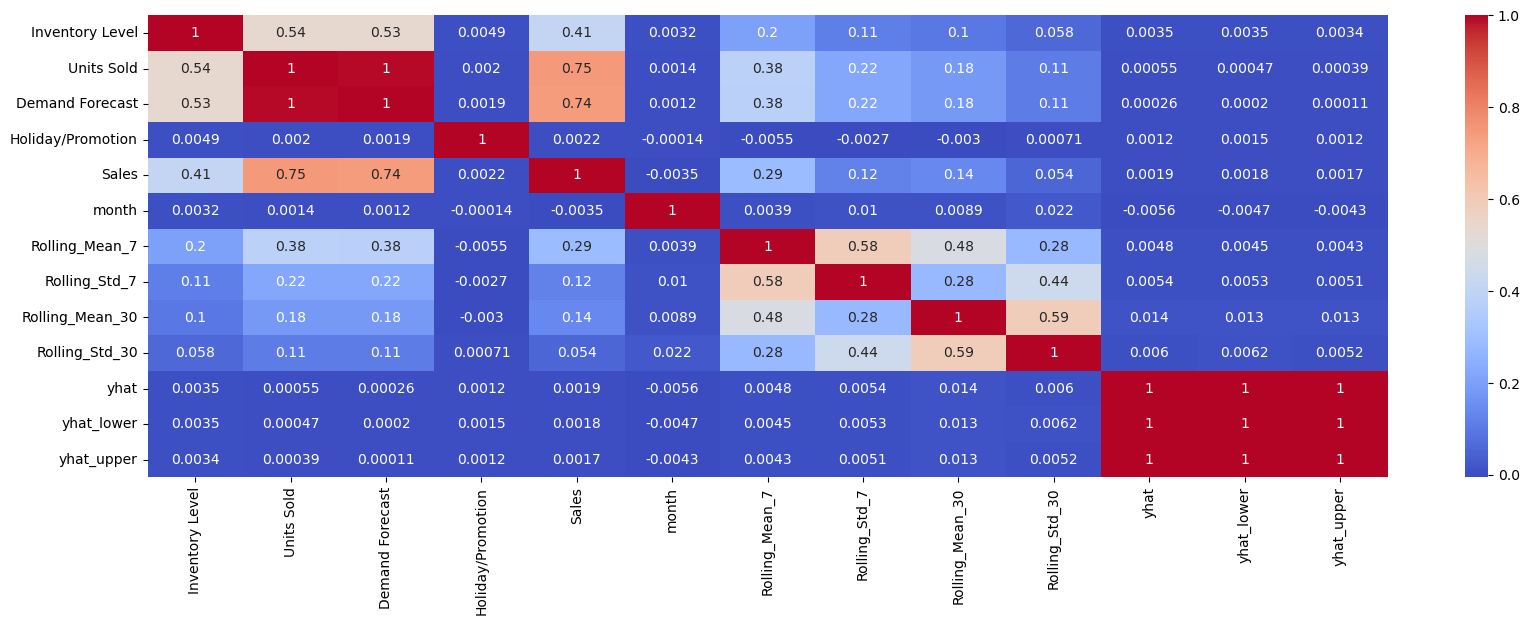

In [43]:
plt.figure(figsize=(20, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [44]:
df.isna().sum()

Date                 0
Inventory Level      0
Units Sold           0
Demand Forecast      0
Holiday/Promotion    0
Seasonality          0
Sales                0
month                0
Rolling_Mean_7       0
Rolling_Std_7        0
Rolling_Mean_30      0
Rolling_Std_30       0
ds                   0
yhat                 0
yhat_lower           0
yhat_upper           0
dtype: int64